In [1]:
import pyspark
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import pandas as pd
import os


In [2]:
DATASET_PATH = "hdfs://localhost:8020/user/csuftitan/styles.csv"
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Fashion').getOrCreate()
spark
fashion_df = spark.read.option('header','true').csv(DATASET_PATH, inferSchema=True).limit(5000)



Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
23/12/10 20:51:41 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
23/12/10 20:51:42 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.


In [3]:
fashion_df.show()

+-----+------+--------------+-----------+------------+----------+------+----+------+--------------------+
|   id|gender|masterCategory|subCategory| articleType|baseColour|season|year| usage|  productDisplayName|
+-----+------+--------------+-----------+------------+----------+------+----+------+--------------------+
|15970|   Men|       Apparel|    Topwear|      Shirts| Navy Blue|  Fall|2011|Casual|Turtle Check Men ...|
|39386|   Men|       Apparel| Bottomwear|       Jeans|      Blue|Summer|2012|Casual|Peter England Men...|
|59263| Women|   Accessories|    Watches|     Watches|    Silver|Winter|2016|Casual|Titan Women Silve...|
|21379|   Men|       Apparel| Bottomwear| Track Pants|     Black|  Fall|2011|Casual|Manchester United...|
|53759|   Men|       Apparel|    Topwear|     Tshirts|      Grey|Summer|2012|Casual|Puma Men Grey T-s...|
| 1855|   Men|       Apparel|    Topwear|     Tshirts|      Grey|Summer|2011|Casual|Inkfruit Mens Cha...|
|30805|   Men|       Apparel|    Topwear|     

In [4]:
fashion_df.printSchema()

root
 |-- id: integer (nullable = true)
 |-- gender: string (nullable = true)
 |-- masterCategory: string (nullable = true)
 |-- subCategory: string (nullable = true)
 |-- articleType: string (nullable = true)
 |-- baseColour: string (nullable = true)
 |-- season: string (nullable = true)
 |-- year: integer (nullable = true)
 |-- usage: string (nullable = true)
 |-- productDisplayName: string (nullable = true)



In [5]:
fashion_df.head(3)

[Row(id=15970, gender='Men', masterCategory='Apparel', subCategory='Topwear', articleType='Shirts', baseColour='Navy Blue', season='Fall', year=2011, usage='Casual', productDisplayName='Turtle Check Men Navy Blue Shirt'),
 Row(id=39386, gender='Men', masterCategory='Apparel', subCategory='Bottomwear', articleType='Jeans', baseColour='Blue', season='Summer', year=2012, usage='Casual', productDisplayName='Peter England Men Party Blue Jeans'),
 Row(id=59263, gender='Women', masterCategory='Accessories', subCategory='Watches', articleType='Watches', baseColour='Silver', season='Winter', year=2016, usage='Casual', productDisplayName='Titan Women Silver Watch')]

In [6]:
fashion_df.select(['id','gender']).show()

+-----+------+
|   id|gender|
+-----+------+
|15970|   Men|
|39386|   Men|
|59263| Women|
|21379|   Men|
|53759|   Men|
| 1855|   Men|
|30805|   Men|
|26960| Women|
|29114|   Men|
|30039|   Men|
| 9204|   Men|
|48123| Women|
|18653|   Men|
|47957| Women|
|46885|  Boys|
|12369|   Men|
|29928|   Men|
|42419| Girls|
|51832| Women|
|47359| Women|
+-----+------+
only showing top 20 rows



In [7]:
from pyspark.sql.functions import concat, col, lit
fashion_df = fashion_df.withColumn('image',concat(fashion_df['id'],lit('.jpg')))



In [8]:
fashion_df.show()


+-----+------+--------------+-----------+------------+----------+------+----+------+--------------------+---------+
|   id|gender|masterCategory|subCategory| articleType|baseColour|season|year| usage|  productDisplayName|    image|
+-----+------+--------------+-----------+------------+----------+------+----+------+--------------------+---------+
|15970|   Men|       Apparel|    Topwear|      Shirts| Navy Blue|  Fall|2011|Casual|Turtle Check Men ...|15970.jpg|
|39386|   Men|       Apparel| Bottomwear|       Jeans|      Blue|Summer|2012|Casual|Peter England Men...|39386.jpg|
|59263| Women|   Accessories|    Watches|     Watches|    Silver|Winter|2016|Casual|Titan Women Silve...|59263.jpg|
|21379|   Men|       Apparel| Bottomwear| Track Pants|     Black|  Fall|2011|Casual|Manchester United...|21379.jpg|
|53759|   Men|       Apparel|    Topwear|     Tshirts|      Grey|Summer|2012|Casual|Puma Men Grey T-s...|53759.jpg|
| 1855|   Men|       Apparel|    Topwear|     Tshirts|      Grey|Summer|

In [9]:
import pandas as pd
spark.conf.set("spark.sql.execution.arrow.enabled", "true")
df = fashion_df.toPandas()
!pip install opencv-python



23/12/10 20:53:49 WARN SQLConf: The SQL config 'spark.sql.execution.arrow.enabled' has been deprecated in Spark v3.0 and may be removed in the future. Use 'spark.sql.execution.arrow.pyspark.enabled' instead of it.
/Users/mrunalpatil/Library/Python/3.9/lib/python/site-packages/pyspark/sql/pandas/conversion.py:111: UserWarning: toPandas attempted Arrow optimization because 'spark.sql.execution.arrow.pyspark.enabled' is set to true; however, failed by the reason below:
  PyArrow >= 4.0.0 must be installed; however, it was not found.
Attempting non-optimization as 'spark.sql.execution.arrow.pyspark.fallback.enabled' is set to true.
  warn(msg)


Defaulting to user installation because normal site-packages is not writeable


In [12]:
import cv2
def plot_images(figures, nrows = 1, ncols=1,figsize=(8, 8)):

    fig, axeslist = plt.subplots(ncols=ncols, nrows=nrows,figsize=figsize)
    for ind,title in enumerate(figures):
        axeslist.ravel()[ind].imshow(cv2.cvtColor(figures[title], cv2.COLOR_BGR2RGB))
        axeslist.ravel()[ind].set_title(title)
        axeslist.ravel()[ind].set_axis_off()
    plt.tight_layout() # optional
    
def img_path(img):
    return "/Users/mrunalpatil/Downloads/fashion-dataset/fashion-dataset/images/"+img

def load_image(img, resized_fac = 0.1):
    img     = cv2.imread(img_path(img))
    w, h, _ = img.shape
    resized = cv2.resize(img, (int(h*resized_fac), int(w*resized_fac)), interpolation = cv2.INTER_AREA)
    return resized
	


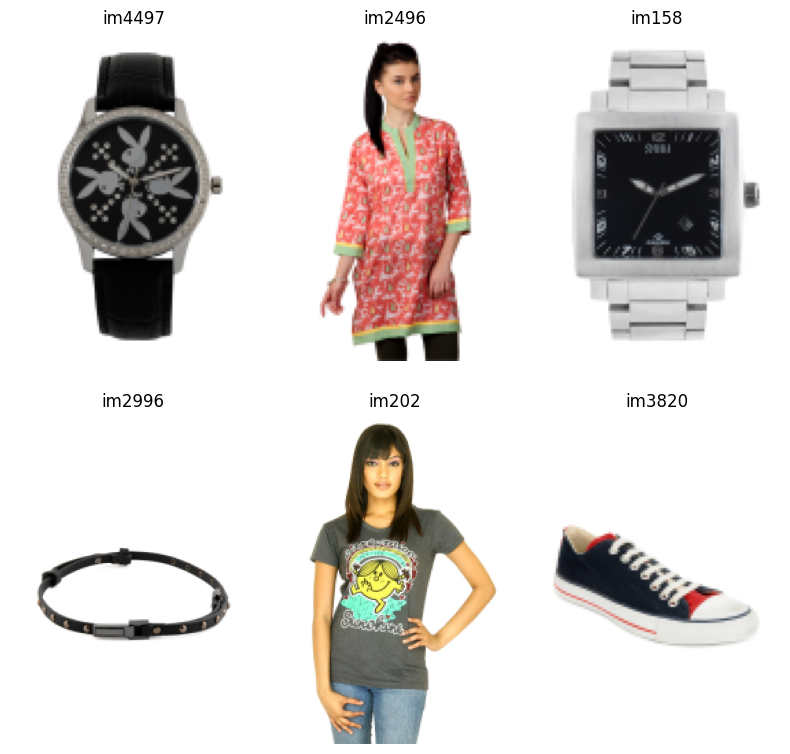

In [14]:
import matplotlib.pyplot as plt
import numpy as np

figures = {'im' + str(i): load_image(row.image) for i, row in df.sample(6).iterrows() if load_image(row.image) is not None}

plot_images(figures, 2, 3)


<Axes: ylabel='articleType'>

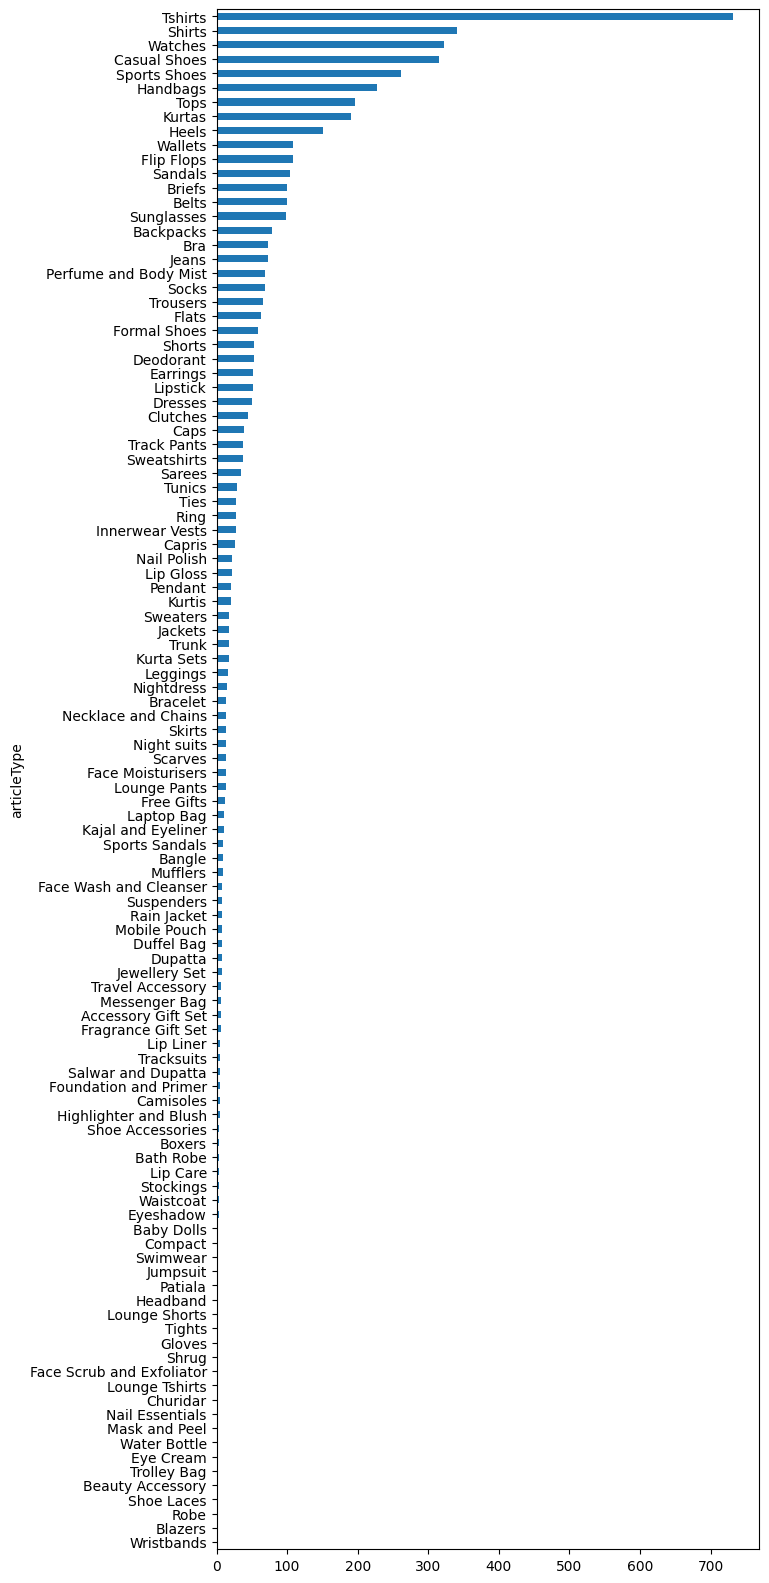

In [15]:
plt.figure(figsize=(7,20))
df.articleType.value_counts().sort_values().plot(kind='barh')



<Axes: ylabel='gender'>

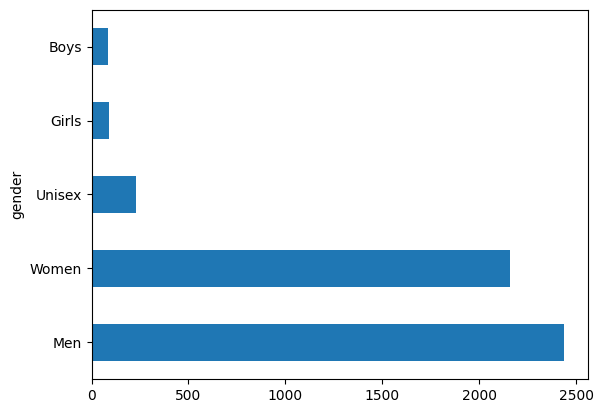

In [17]:
df.gender.value_counts().plot(kind = 'barh')

<Axes: xlabel='year'>

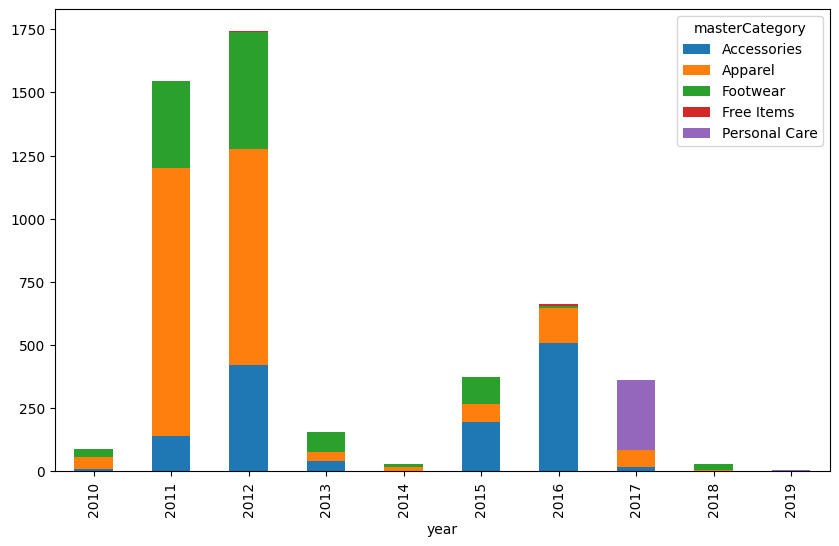

In [18]:
grouped_data = df.groupby(['year', 'masterCategory']).size().unstack()

# Plotting the bar graph
grouped_data.plot(kind='bar', stacked=True, figsize=(10, 6))


<Axes: xlabel='year'>

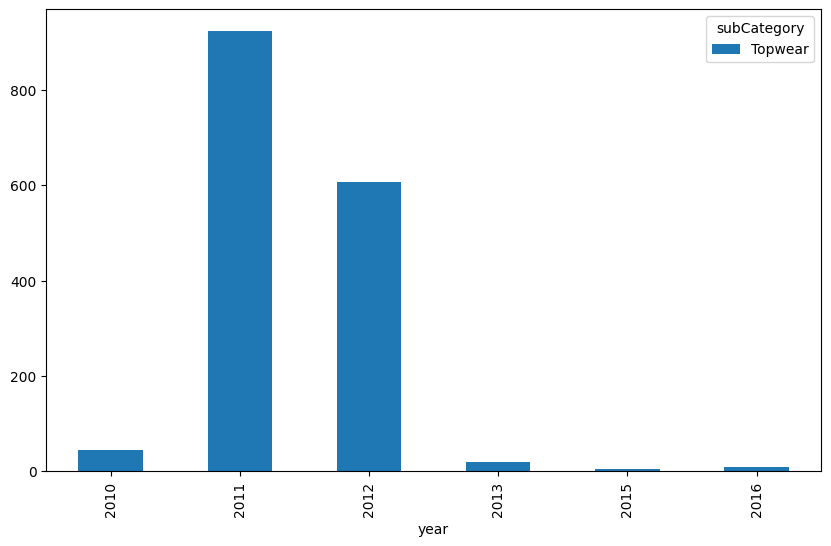

In [19]:
selected_master_categories = ['Topwear']

# Filter the DataFrame to include only the selected masterCategory values
filtered_df = df[df['subCategory'].isin(selected_master_categories)]

# Group by 'year', 'masterCategory', and the desired attribute, then count the occurrences
grouped_data3 = filtered_df.groupby(['year', 'subCategory']).size().unstack()
grouped_data3.plot(kind='bar', stacked=True, figsize=(10, 6))

<Axes: xlabel='year'>

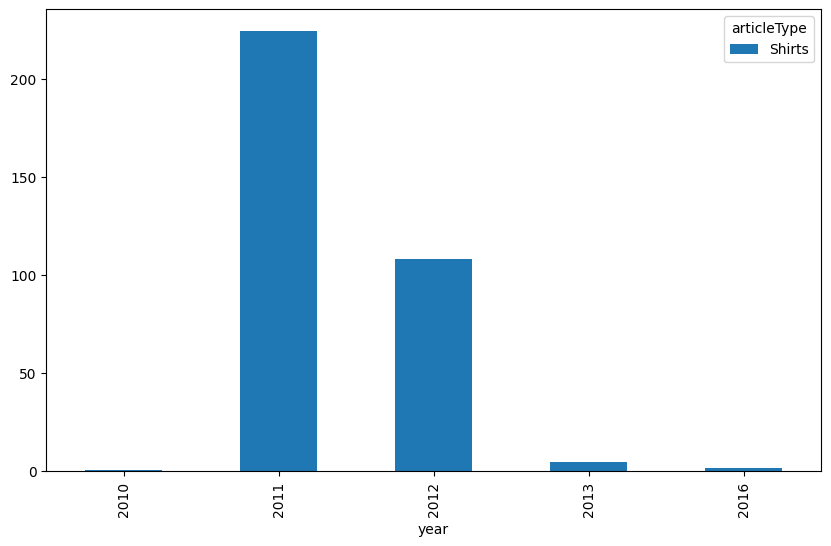

In [20]:
selected_master_categories = ['Shirts']

# Filter the DataFrame to include only the selected masterCategory values
filtered_df = df[df['articleType'].isin(selected_master_categories)]

# Group by 'year', 'masterCategory', and the desired attribute, then count the occurrences
grouped_data3 = filtered_df.groupby(['year', 'articleType']).size().unstack()
grouped_data3.plot(kind='bar', stacked=True, figsize=(10, 6))

<Axes: xlabel='year'>

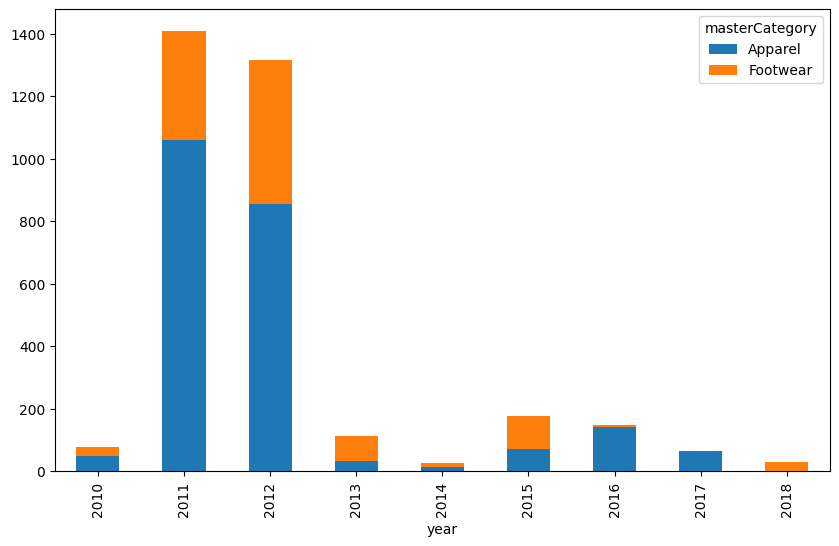

In [21]:
selected_master_categories = ['Apparel', 'Footwear']

# Filter the DataFrame to include only the selected masterCategory values
filtered_df = df[df['masterCategory'].isin(selected_master_categories)]

# Group by 'year', 'masterCategory', and the desired attribute, then count the occurrences
grouped_data3 = filtered_df.groupby(['year', 'masterCategory']).size().unstack()
grouped_data3.plot(kind='bar', stacked=True, figsize=(10, 6))


<Axes: xlabel='year'>

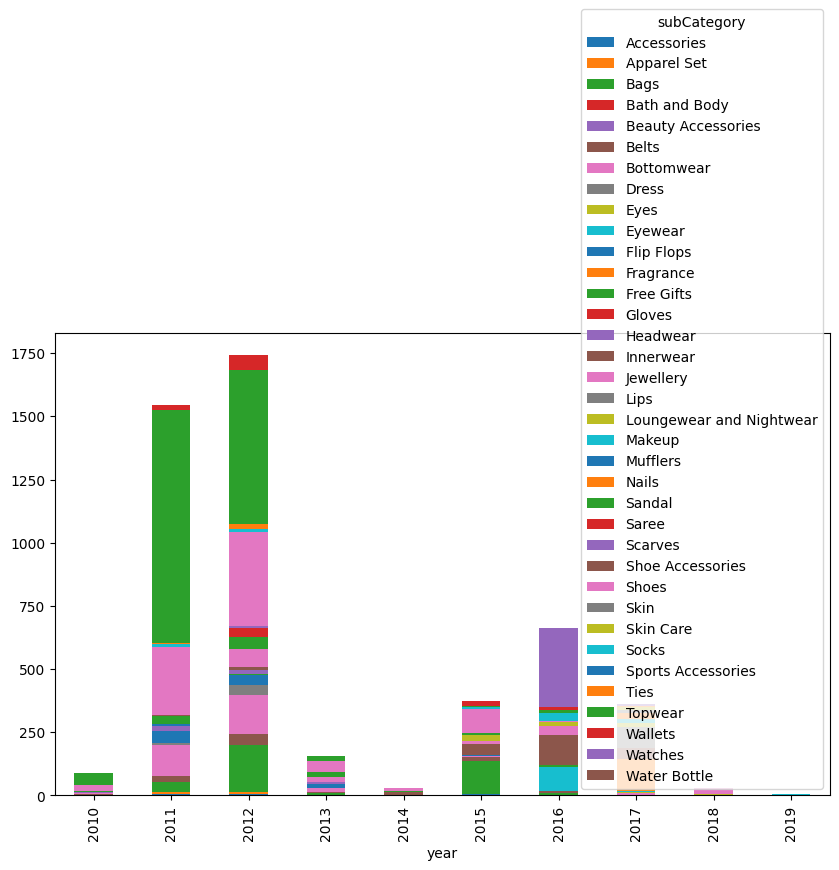

In [22]:
grouped_data2 = df.groupby(['year', 'subCategory']).size().unstack()

# Plotting the bar graph
grouped_data2.plot(kind='bar', stacked=True, figsize=(10, 6))

In [24]:
import tensorflow as tf
import keras as keras
from keras import Model
from tensorflow.keras.applications.resnet50 import ResNet50
from keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from keras.layers import GlobalMaxPooling2D
tf.__version__

'2.15.0'

In [25]:
import ssl
import urllib.request

# Disable SSL verification globally
ssl._create_default_https_context = ssl._create_unverified_context

# Your existing code goes here
img_width, img_height, _ = 224, 224, 3
base_model = ResNet50(weights='imagenet', 
                      include_top=False, 
                      input_shape=(img_width, img_height, 3))
base_model.trainable = False

model = keras.Sequential([
    base_model,
    GlobalMaxPooling2D()
])

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 7, 7, 2048)        23587712  
                                                                 
 global_max_pooling2d (Glob  (None, 2048)              0         
 alMaxPooling2D)                                                 
                                                                 
Total params: 23587712 (89.98 MB)
Trainable params: 0 (0.00 Byte)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [26]:
def get_image_embedding(model, img_name):
    img = image.load_img(img_path(img_name), target_size=(img_width, img_height))
    x   = image.img_to_array(img)
    x   = np.expand_dims(x, axis=0)
    x   = preprocess_input(x)
    return model.predict(x).reshape(-1)


In [27]:
emb = get_image_embedding(model, df.iloc[0].image)
emb.shape


1/1 [==============================] - 1s 705ms/step


(2048,)

(240, 180, 3)
[ 5.939156   2.3722544  0.        ...  1.3595549  0.        10.893194 ]


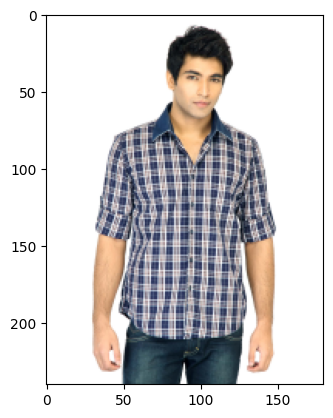

In [28]:
img_array = load_image(df.iloc[0].image)
plt.imshow(cv2.cvtColor(img_array, cv2.COLOR_BGR2RGB))
print(img_array.shape)
print(emb)



In [29]:
df.shape


(5000, 11)

In [30]:
%%time
df_sample      = df
map_embeddings = df_sample['image'].apply(lambda img: get_image_embedding(model, img))
embeddings_df        = map_embeddings.apply(pd.Series)

print(embeddings_df.shape)
embeddings_df.head()



1/1 [==============================] - 0s 71ms/step
(5000, 2048)
CPU times: user 17min 50s, sys: 2min 23s, total: 20min 14s
Wall time: 7min 26s


,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,5.939156,2.372254,0.000000,3.246113,0.957500,2.766367,8.802004,6.304136,0.805903,1.697345,...,2.396973,0.000000,1.801748,20.561760,3.954446,0.000000,8.289474,1.359555,0.000000,10.893194
1,5.790415,9.593643,0.000000,9.431679,0.287234,0.259954,17.028749,3.037460,0.136345,0.000000,...,1.670575,0.013893,10.338676,4.784731,0.189146,0.000000,7.739138,0.372686,0.000000,8.903808
2,0.000000,3.162253,0.484690,0.172309,2.609543,3.840850,3.426138,0.253252,1.098906,1.418279,...,0.434928,14.092829,3.018737,2.134503,2.549050,0.377385,6.180362,0.636619,14.018171,11.415056
3,5.882205,1.958617,0.000000,12.519891,0.000000,0.000000,9.383590,3.781626,0.000000,1.490615,...,17.825491,0.000000,3.592508,2.042312,0.000000,0.000000,6.656785,1.457310,1.694215,1.403317
4,0.245960,17.383430,0.493822,3.374467,2.567367,0.000000,6.482544,5.862635,0.000000,3.164863,...,4.464026,0.447083,1.448135,12.884142,0.000000,0.397493,5.028077,1.939694,0.000000,11.485397


In [31]:
df

,id,gender,masterCategory,subCategory,articleType,baseColour,season,year,usage,productDisplayName,image
0,15970,Men,Apparel,Topwear,Shirts,Navy Blue,Fall,2011,Casual,Turtle Check Men Navy Blue Shirt,15970.jpg
1,39386,Men,Apparel,Bottomwear,Jeans,Blue,Summer,2012,Casual,Peter England Men Party Blue Jeans,39386.jpg
2,59263,Women,Accessories,Watches,Watches,Silver,Winter,2016,Casual,Titan Women Silver Watch,59263.jpg
3,21379,Men,Apparel,Bottomwear,Track Pants,Black,Fall,2011,Casual,Manchester United Men Solid Black Track Pants,21379.jpg
4,53759,Men,Apparel,Topwear,Tshirts,Grey,Summer,2012,Casual,Puma Men Grey T-shirt,53759.jpg
...,...,...,...,...,...,...,...,...,...,...,...
4995,44573,Men,Footwear,Sandal,Sandals,Brown,Summer,2012,Casual,Coolers Men Brown Sandals,44573.jpg
4996,37081,Women,Accessories,Bags,Handbags,Brown,Summer,2012,Casual,Lino Perros Women Brown Handbag,37081.jpg
4997,57958,Women,Apparel,Saree,Sarees,Green,Summer,2012,Ethnic,Prafful Green Printed Sari,57958.jpg
4998,5654,Men,Footwear,Shoes,Sports Shoes,White,Summer,2011,Sports,Reebok Men's Winning Stride White Shoe,5654.jpg


In [32]:
from sklearn.metrics.pairwise import pairwise_distances
cosine_sim = 1-pairwise_distances(embeddings_df, metric='cosine')
cosine_sim[:4, :4]



array([[0.9999987 , 0.71280426, 0.4537503 , 0.67937243],
       [0.71280426, 0.99999976, 0.4151532 , 0.83330923],
       [0.4537503 , 0.4151532 , 0.999999  , 0.44629472],
       [0.67937243, 0.83330923, 0.44629472, 0.99999964]], dtype=float32)

In [33]:
indices = pd.Series(range(len(df)), index=df.index)
indices
def get_recommender(idx, df, top_n = 5):
    similarity_idx    = indices[idx]
    similarity_scores = list(enumerate(cosine_sim[similarity_idx]))
    similarity_scores = sorted(similarity_scores, key=lambda x: x[1], reverse=True)
    similarity_scores = similarity_scores[1:top_n+1]
    recommended_idx    = [i[0] for i in similarity_scores]
    similarity_values    = [i[1] for i in similarity_scores]
    
    return indices.iloc[recommended_idx].index, similarity_values

get_recommender(2993, df, top_n = 5)



(Index([251, 659, 2400, 0, 1821], dtype='int64'),
 [0.92443085, 0.9223511, 0.918767, 0.9146251, 0.91380036])

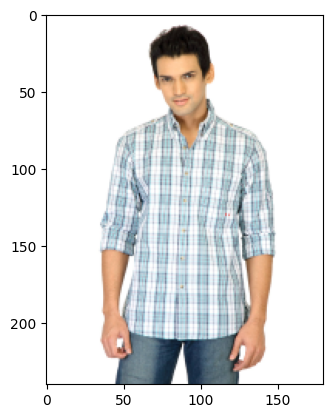

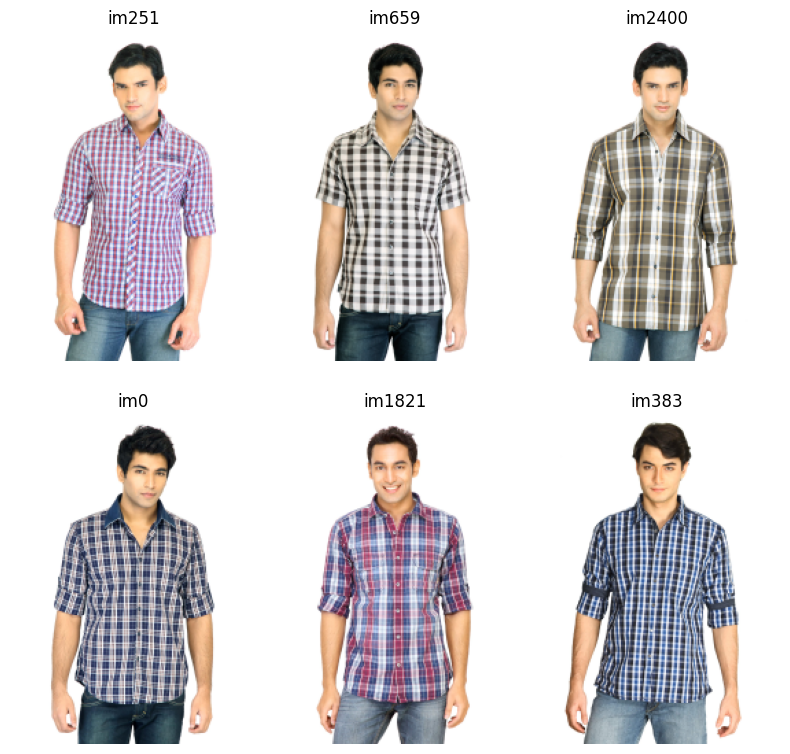

In [34]:
idx_ref = 2993
recommended_idx, similarity_values = get_recommender(idx_ref, df, top_n = 6)
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[recommended_idx].iterrows()}
plot_images(figures, 2, 3)



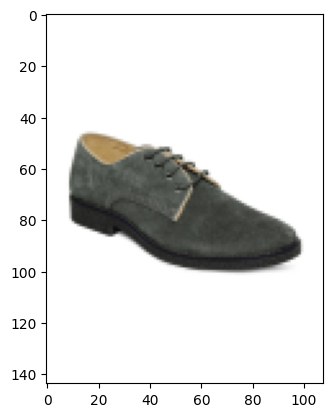

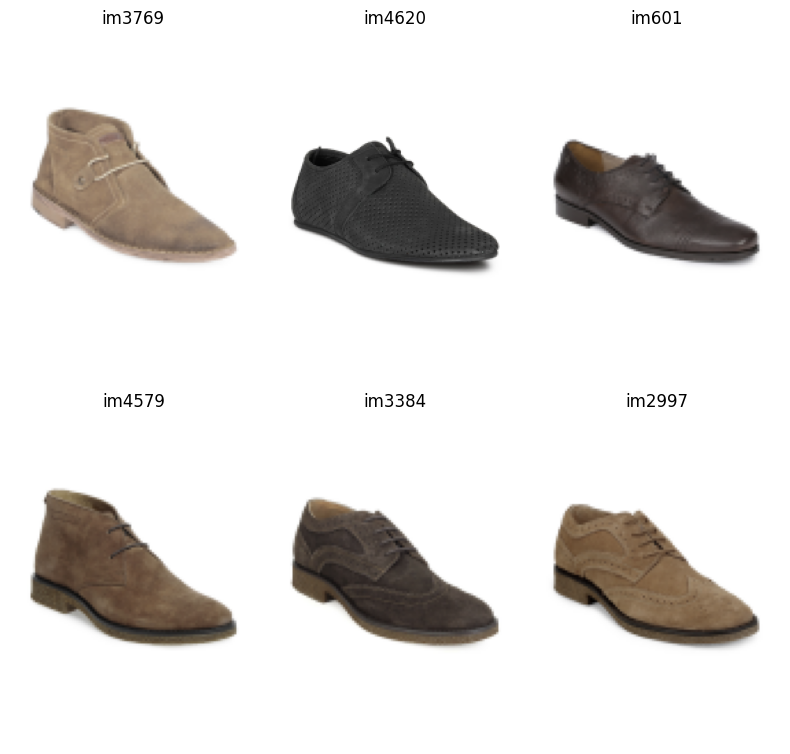

In [35]:
idx_ref = 876
recommended_idx, similarity_values = get_recommender(idx_ref, df, top_n = 6)
plt.imshow(cv2.cvtColor(load_image(df.iloc[idx_ref].image), cv2.COLOR_BGR2RGB))
figures = {'im'+str(i): load_image(row.image) for i, row in df.loc[recommended_idx].iterrows()}
plot_images(figures, 2, 3)